<>:181: SyntaxWarning: invalid escape sequence '\S'
<>:181: SyntaxWarning: invalid escape sequence '\S'
C:\Users\SUDIP\AppData\Local\Temp\ipykernel_18032\2442292223.py:181: SyntaxWarning: invalid escape sequence '\S'
  Text = re.sub('https?://\S+|www\.\S+', '', Text)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUDIP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUDIP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SUDIP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\SUDIP\AppData\Local\Temp\ipykernel_18032\2442292223.py:115: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will 

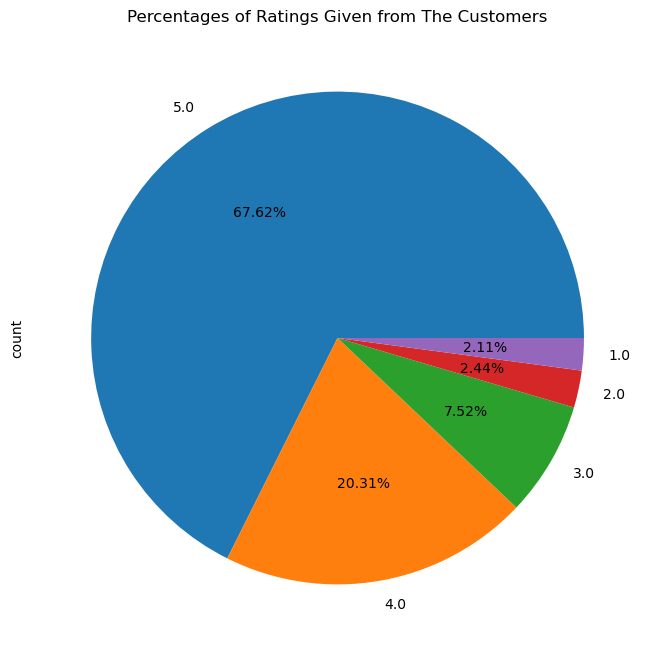

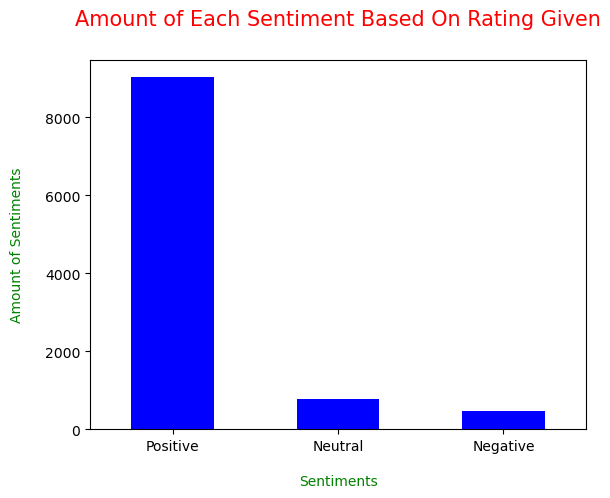

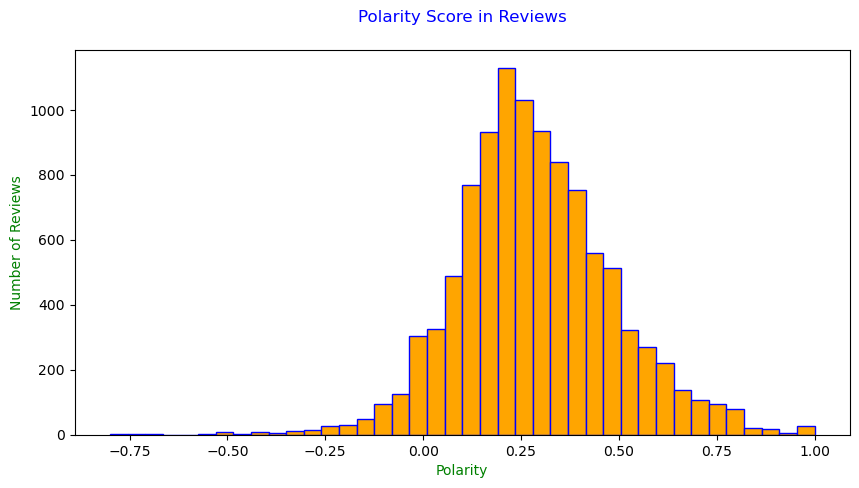

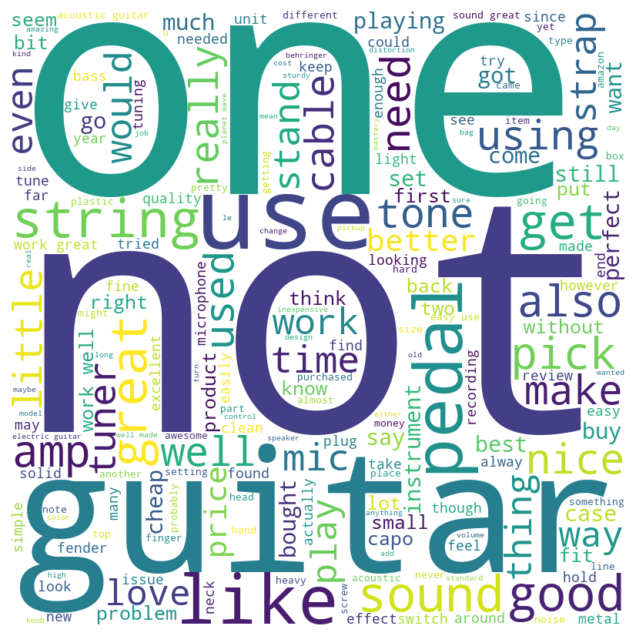

Original target distribution: Counter({2: 9022, 1: 772, 0: 467})
Resampled target distribution: Counter({2: 6315, 1: 6315, 0: 6315})
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.49      0.48       140
           1       0.34      0.41      0.37       232
           2       0.94      0.92      0.93      2707

    accuracy                           0.86      3079
   macro avg       0.58      0.61      0.59      3079
weighted avg       0.87      0.86      0.87      3079

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.03      0.05       140
           1       0.23      0.04      0.07       232
           2       0.88      0.99      0.93      2707

    accuracy                           0.87      3079
   macro avg       0.49      0.35      0.35      3079
weighted avg       0.81      0.87      0.83      3079

SVM Classification Report

'---\n\n# Conclusion and Recommendations\n\n*Based on the performance metrics of each model, choose the best one for your application. The use of cross-validation and hyperparameter tuning can further optimize model performance.*\n\n*For future improvements, consider exploring advanced NLP techniques, different feature extraction methods, or more complex models.*\n\n*Additionally, if your model continues to have issues with predicting all classes, review the data preprocessing steps and ensure the training data accurately represents all sentiment classes.*\n\n**End of Notebook**\n\n---\n\n**References**\n\n- Kaggle Dataset\n- scikit-learn Documentation\n- imbalanced-learn Documentation\n- nltk Documentation\n- TextBlob Documentation\n- WordCloud Documentation\n\n'

In [2]:
# -*- coding: utf-8 -*-
"""Sentiment Analysis.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Jb0-XtSdSdEoTIYw6suN4nzlao4vaXX0JY

# **Sentiment Analysis**

This is a notebook containing **Sentiment Analysis** Mini Project on *Amazon Musical Instruments Reviews*. I am interested in Natural Language Processing and that is my motivation to make this project. I think that sentiment analysis has a really powerful impact in business developments because we can gain many insights from it.

---

# Libraries

**Data Libraries**
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""**NLP Text Libraries**"""

import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

"""**EDA Analysis**"""

# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

"""**Feature Engineering**"""

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

"""**Model Selection and Evaluation**"""

# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

"""---

# The Dataset

*The dataset that we will use is taken from `Kaggle` website and can be downloaded here:*

[`Amazon Musical Instruments Reviews`](https://www.kaggle.com/eswarchandt/amazon-music-reviews?select=Musical_instruments_reviews.csv)

*There are two formats available of the dataset: `JSON` and `CSV`. We will use the `CSV` one in this project.*

*Overall, the dataset talks about the feedback received after the customers purchased musical instruments from `Amazon`.*

**Read The Dataset**
"""

dataset = pd.read_csv("Data_sets/Musical_Instruments_Reviews.csv")

"""**Shape of The Dataset**"""

dataset.shape

"""*From this, we can infer that the dataset consists of 10261 rows and 9 columns.*

---

# Data Preprocessing

**Checking Null Values**
"""

dataset.isnull().sum()

"""*From above, there are two columns in the dataset with null values: `reviewText` and `reviewerName`. While the latter one is not really important, we should focus on the first column. We cannot remove these rows because the ratings and summary given from the customers will have some effects on our model later (although the number of missing rows is small). Because of it, we can fill the empty values with an empty string.*

**Filling Missing Values**
"""

dataset.reviewText.fillna(value = "", inplace = True)

"""**Concatenate `reviewText` and `summary` Columns**"""

dataset["reviews"] = dataset["reviewText"] + " " + dataset["summary"]
dataset.drop(columns = ["reviewText", "summary"], axis = 1, inplace = True)

"""**Statistic Description of The Dataset**"""

dataset.describe(include = "all")

"""*From the description above, we know that the ratings given from the customers will have the range of [1, 5] as shown above. Also, the average rating given to musical instruments sold is 4.48. We can also see our new column `reviews` is there to concatenate both `summary` and `reviewText`.*

**Percentages of Ratings Given from The Customers**
"""

dataset.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

"""*From the chart above, the majority of musical instruments sold on Amazon have perfect ratings of 5.0, meaning the condition of the products is good. If we were to denote that ratings above 3 are `positive`, ratings equal to 3 are `neutral`, and ratings under 3 are `negative`, we know that the number of negative reviews given in the dataset is relatively small. This might affect our model later.*

**Labelling Products Based On Ratings Given**

*Our dataset does not have any dependent variable, or in other words, we haven't had any prediction target yet. We will categorize each sentiment according to ratings given for each row based on the explanation before: `Positive` Label for products with rating bigger than 3.0, `Neutral` Label for products with rating equal to 3.0, else `Negative` Label.*
"""

def Labelling(Rows):
    if Rows["overall"] > 3.0:
        Label = "Positive"
    elif Rows["overall"] < 3.0:
        Label = "Negative"
    else:
        Label = "Neutral"
    return Label

dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

dataset["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiment Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

"""*In this part, we can actually change the labels into numeric values, but for the sake of experiments, we will do it later. Also, notice that from the graph we can see that most of our data contains positive sentiments, which is true from the exploration before.*

---

# Text Preprocessing

**Text Cleaning**
"""

def Text_Cleaning(Text):
    # Lowercase the texts
    Text = Text.lower()

    # Cleaning punctuations in the text
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    # Removing numbers in the text
    Text = re.sub(r'\d+', '', Text)

    # Remove possible links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

    # Deleting newlines
    Text = re.sub('\n', '', Text)

    return Text

"""**Text Processing**"""

# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
    Processed_Text = list()
    Lemmatizer = WordNetLemmatizer()

    # Tokens of Words
    Tokens = nltk.word_tokenize(Text)

    # Removing Stopwords and Lemmatizing Words
    # To reduce noise in our dataset and to keep it simple and still 
    # powerful, we will only omit the word `not` from the list of stopwords
    for word in Tokens:
        if word not in Stopwords:
            Processed_Text.append(Lemmatizer.lemmatize(word))

    return(" ".join(Processed_Text))

"""**Applying The Functions**"""

dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Cleaning(Text))
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Processing(Text))

"""---

# Exploratory Data Analysis

**Overview of The Dataset**
"""

dataset.head(n = 10)

"""*With the overview above, we know that for sentiment analysis, `reviews` is important to our model and we should use this aspect as our feature. By using this feature, we will need to predict what our sentiment will be classified into.*

**About Other Features**
"""

dataset.describe(include = "all")

"""*Now, we will go back to the statistic description of our dataset. Intuitively, the other features from our dataset do not really have any impact on determining our sentiment later. We might use the `helpful` part in our model, but as we can see from the description above, the top values of it are [0,0], which means that most users do not really take their votes in it. Because of it, we can also decide that we don't really need it in our model.*

**Polarity, Review Length, and Word Counts**

*To justify our analysis before, we will dive further into the dataset a bit more from the polarity of the texts, also from the words used in the reviews. We will generate some new columns in our dataset and visualize it.*

Polarity
"""

dataset["polarity"] = dataset["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", color = "green")
plt.ylabel("Number of Reviews", color = "green")
plt.show()

"""*As we can see, the polarity score from the reviews is between -1 and 1, where 0 means a neutral review. The reviews with positive sentiment have a higher number of polarity score compared to those with negative sentiment.*

**Review Length and Word Counts**
"""

# Counting Words
dataset["word_count"] = dataset["reviews"].apply(lambda Text: len(Text.split()))
dataset["review_length"] = dataset["reviews"].apply(lambda Text: len(Text))

dataset[["word_count", "review_length"]].describe()

"""*Overall, the maximum word count and review length is very high, which indicates that some of the reviews are very long. We can use these new features in our model, but we will not do that in this notebook.*

**Word Cloud**
"""

# Converting The Reviews Column to List of Texts
Texts = dataset["reviews"].tolist()

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = Stopwords, min_font_size = 10).generate(" ".join(Texts))

# Plot Word Cloud
plt.figure(figsize = (8,8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

"""---

# Modeling

**Label Encoding The Target**

*In order to use a classifier, we should convert the categorical target variable into numeric classes.*
"""

encoder = LabelEncoder()
dataset["encoded_sentiment"] = encoder.fit_transform(dataset["sentiment"])

"""**Preparing The Features and Target**"""

X = dataset["reviews"]
y = dataset["encoded_sentiment"]

# Splitting The Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

"""**Text Vectorization**"""

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution
print("Original target distribution:", Counter(y))
print("Resampled target distribution:", Counter(y_train))

"""**Model Selection and Hyperparameter Tuning**

*Try different models and find the best-performing one with cross-validation.*

**Logistic Regression**
"""

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

"""**Random Forest Classifier**
"""

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

"""**Support Vector Machine**
"""

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

"""**Decision Tree Classifier**
"""

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

"""**Naive Bayes Classifier**
"""

nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

"""---

# Conclusion and Recommendations

*Based on the performance metrics of each model, choose the best one for your application. The use of cross-validation and hyperparameter tuning can further optimize model performance.*

*For future improvements, consider exploring advanced NLP techniques, different feature extraction methods, or more complex models.*

*Additionally, if your model continues to have issues with predicting all classes, review the data preprocessing steps and ensure the training data accurately represents all sentiment classes.*

**End of Notebook**

---

**References**

- Kaggle Dataset
- scikit-learn Documentation
- imbalanced-learn Documentation
- nltk Documentation
- TextBlob Documentation
- WordCloud Documentation

"""


In [3]:
# Define more sample texts
more_sample_texts = ['it is worst',"I hate this product!", "This is awesome!", "It could be better.", "I like the sound of this guitar.", "The service was fantastic.", "You are great!"]

# Process the sample texts
more_sample_texts_processed = [Text_Processing(Text_Cleaning(text)) for text in more_sample_texts]

# Transform the processed texts using TF-IDF
more_sample_features = tfidf.transform(more_sample_texts_processed)

# Predict the sentiment for the sample texts=
more_sample_predictions = log_reg.predict(more_sample_features)  # Replace `log_reg` with your chosen classifier

# Convert numeric predictions back to sentiment labels
more_sample_predictions_labels = encoder.inverse_transform(more_sample_predictions)

print("More Sample Predictions:", more_sample_predictions_labels)


More Sample Predictions: ['Positive' 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive'
 'Positive']


In [4]:
import os 
import joblib

In [8]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/mlp_model.pkl'
joblib.dump(log_reg, model_path)
joblib.dump(tfidf, 'ML_MODEL/tfidf_vectorizer.pkl')
joblib.dump(encoder, 'ML_MODEL/encoder.pkl')
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/mlp_model.pkl
